In [1]:
import pandas as pd

In [2]:
logon_user=pd.read_csv(r'F:\clean R4\logon\user_agg.csv')
file_user=pd.read_csv(r'F:\clean R4\file\user_agg.csv')
http_user=pd.read_csv(r'F:\clean R4\http\user_http_agg.csv')
device_user=pd.read_csv(r'F:\clean R4\device\user_agg.csv')
psy_user=pd.read_csv(r'F:\clean R4\Psychometric\psy_data_aggregated_mapped.csv')



In [3]:
logon_user.head()

,user,total_logons,unique_pcs,first_seen,last_seen,active_days,offhour_logons,weekend_logons
0,AAE0190,692,1,2010-01-04 08:09:00,2011-05-16 18:10:00,346,346,0
1,AAF0535,328,1,2010-01-04 08:56:00,2010-08-24 16:54:00,164,0,0
2,AAF0791,692,1,2010-01-04 08:06:00,2011-05-16 17:14:00,346,0,0
3,AAL0706,692,1,2010-01-04 07:38:00,2011-05-16 16:59:00,346,346,0
4,AAM0658,458,1,2010-01-04 09:14:00,2010-11-17 21:15:00,225,234,2


In [4]:
file_user.head()

,user,total_files,unique_pcs,sensitive_files,avg_file_length,top_file_extension
0,AAF0535,357,357,29,351.0,doc
1,AAM0658,31,31,9,390.0,doc
2,ABC0174,589,589,40,374.0,doc
3,AHD0848,199,199,19,377.0,doc
4,AHM0410,2198,2198,291,372.0,doc


In [5]:
http_user.head()

,user,total_requests,unique_urls,unique_content_type,unique_pcs,first_request,last_request,active_days,offhours_requests,weekdays_requests
0,AAE0190,49478,230,49478,1,2010-01-04,2011-05-16,346,0,0
1,AAF0535,4878,109,4878,1,2010-01-04,2010-08-24,164,0,0
2,AAF0791,32870,357,32870,1,2010-01-04,2011-05-16,346,0,0
3,AAL0706,3460,203,3460,1,2010-01-04,2011-05-16,346,184,0
4,AAM0658,6498,127,6498,1,2010-01-04,2010-11-17,225,1417,4


In [6]:
device_user.head()


,user,total_logons,unique_pcs,first_seen,last_seen,active_days,offhour_logons,weekend_logons
0,AAF0535,688,1,2010-01-05 11:45:35,2010-08-24 14:03:57,155,0,0
1,AAM0658,13,1,2010-10-21 00:22:06,2010-11-02 02:40:52,5,13,2
2,ABC0174,1276,1,2010-01-02 14:05:23,2010-12-24 15:53:02,282,56,178
3,AHD0848,299,1,2010-01-07 16:25:58,2011-05-10 16:49:19,113,48,36
4,AHM0410,782,1,2010-01-04 12:44:53,2011-05-16 11:01:31,256,7,8


In [7]:
psy_user.head()

,employee_name,user_id,O,C,E,A,N,dominating_trait
0,Calvin Edan Love,CEL0561,0.20,0.222857,0.205714,0.11875,0.133333,2
1,Christine Reagan Deleon,CRD0624,0.13,0.125714,0.097143,0.24375,0.106667,4
2,Jade Felicia Caldwell,JFC0557,0.11,0.091429,0.131429,0.25000,0.110000,4
3,Aquila Stewart Dejesus,ASD0577,0.20,0.274286,0.205714,0.08750,0.123333,2
4,Micah Abdul Rojas,MAR0955,0.18,0.251429,0.131429,0.27500,0.083333,4


## before merging check that user_id and user are the same column or not

In [8]:
user_logon=set(logon_user['user'].unique())
user_ldap=set(psy_user['user_id'].unique())

overlap= len(user_logon & user_ldap) / len(user_logon) *100
print(overlap)

100.0


In [9]:
sample_user='AAM0658'

print("logon entry")
print(logon_user[logon_user['user']==sample_user])


logon entry
      user  total_logons  unique_pcs           first_seen  \
4  AAM0658           458           1  2010-01-04 09:14:00   

             last_seen  active_days  offhour_logons  weekend_logons  
4  2010-11-17 21:15:00          225             234               2  


In [ ]:
print('psychometric entry')
print(psy_user[psy_user["user_id"]==sample_user])

LDAP entry
        employee_name  user_id      O    C         E      A         N  \
163  Abel Adam Morton  AAM0658  0.215  0.2  0.211429  0.225  0.073333   

     dominating_trait  
163                 4  


## conclusion yes both the column are same 

In [11]:

psy_user = psy_user.rename(columns={"user_id": "user"})

In [12]:
print(logon_user['user'].nunique(), len(logon_user))

1000 1000


In [13]:
print(file_user['user'].nunique(), len(file_user))

264 264


In [14]:
print(device_user['user'].nunique(),len(device_user))

265 265


In [15]:
print(http_user['user'].nunique(),len(http_user))

1000 1000


In [16]:
print(psy_user['user'].nunique(),len(psy_user))

1000 1000


In [17]:
#logon
logon_user=logon_user[['user','total_logons','unique_pcs','active_days','offhour_logons','weekend_logons']]

# file
file_user = file_user[['user', 'total_files', 'sensitive_files', 'unique_pcs','avg_file_length']]

# device
device_user = device_user[['user', 'total_logons', 'unique_pcs','active_days','offhour_logons','weekend_logons']]

# http
http_user = http_user[['user', 'total_requests', 'unique_urls', 'unique_content_type', 'unique_pcs', 'active_days', 'offhours_requests', 'weekdays_requests']]

# psychometric
psy_user = psy_user[['user', 'dominating_trait', 'O','C','E','A','N']]

In [18]:
# Rename 'unique_pcs' columns to avoid conflicts
file_user_renamed = file_user.rename(columns={'unique_pcs': 'unique_pcs_file'})
http_user_renamed = http_user.rename(columns={'unique_pcs': 'unique_pcs_http'})
device_user_renamed = device_user.rename(columns={'unique_pcs': 'unique_pcs_device'})

user_bheaviour = logon_user.merge(file_user_renamed, on='user', how='outer') \
    .merge(http_user_renamed, on='user', how='outer') \
    .merge(device_user_renamed, on='user', how='outer') \
    .merge(psy_user, on='user', how='outer')

In [19]:
user_bheaviour.head(20)

,user,total_logons_x,unique_pcs,active_days_x,offhour_logons_x,weekend_logons_x,total_files,sensitive_files,unique_pcs_file,avg_file_length,...,unique_pcs_device,active_days,offhour_logons_y,weekend_logons_y,dominating_trait,O,C,E,A,N
0,AAE0190,692,1,346,346,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,0.180,0.171429,0.080000,0.31250,0.096667
1,AAF0535,328,1,164,0,0,357.0,29.0,357.0,351.0,...,1.0,155.0,0.0,0.0,4,0.085,0.120000,0.205714,0.20625,0.103333
2,AAF0791,692,1,346,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,0.070,0.228571,0.228571,0.31250,0.113333
3,AAL0706,692,1,346,346,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0.185,0.080000,0.160000,0.08125,0.083333
4,AAM0658,458,1,225,234,2,31.0,9.0,31.0,390.0,...,1.0,5.0,13.0,2.0,4,0.215,0.200000,0.211429,0.22500,0.073333
5,AAN0823,692,1,346,346,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,0.120,0.091429,0.257143,0.15000,0.093333
6,AAS0442,136,1,50,22,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,0.180,0.245714,0.125714,0.13750,0.103333
7,AAV0450,692,1,346,345,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,0.220,0.137143,0.205714,0.25625,0.110000
8,AAW0353,692,1,346,397,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,0.245,0.257143,0.108571,0.15625,0.113333
9,ABC0174,829,1,296,296,126,589.0,40.0,589.0,374.0,...,1.0,282.0,56.0,178.0,2,0.075,0.234286,0.194286,0.08125,0.106667


In [20]:
user_bheaviour.tail()

,user,total_logons_x,unique_pcs,active_days_x,offhour_logons_x,weekend_logons_x,total_files,sensitive_files,unique_pcs_file,avg_file_length,...,unique_pcs_device,active_days,offhour_logons_y,weekend_logons_y,dominating_trait,O,C,E,A,N
995,ZKS0899,770,2,346,346,0,8537.0,704.0,8537.0,365.0,...,1.0,344.0,119.0,0.0,4,0.235,0.114286,0.240000,0.26875,0.100000
996,ZMC0284,692,1,346,346,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,0.210,0.188571,0.234286,0.18750,0.103333
997,ZSB0649,692,1,346,346,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,0.115,0.142857,0.205714,0.08750,0.086667
998,ZSK0258,692,1,346,346,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,0.190,0.200000,0.120000,0.23125,0.083333
999,ZSL0305,692,1,346,175,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,0.105,0.148571,0.102857,0.25625,0.106667


In [21]:
user_bheaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user                 1000 non-null   object 
 1   total_logons_x       1000 non-null   int64  
 2   unique_pcs           1000 non-null   int64  
 3   active_days_x        1000 non-null   int64  
 4   offhour_logons_x     1000 non-null   int64  
 5   weekend_logons_x     1000 non-null   int64  
 6   total_files          264 non-null    float64
 7   sensitive_files      264 non-null    float64
 8   unique_pcs_file      264 non-null    float64
 9   avg_file_length      264 non-null    float64
 10  total_requests       1000 non-null   int64  
 11  unique_urls          1000 non-null   int64  
 12  unique_content_type  1000 non-null   int64  
 13  unique_pcs_http      1000 non-null   int64  
 14  active_days_y        1000 non-null   int64  
 15  offhours_requests    1000 non-null   in

In [22]:
# Replace NaN with 0
df = user_bheaviour.fillna(0)

# Convert numeric columns to int where possible
for col in df.columns:
    if df[col].dtype == 'float64':
        # If all values are actually integers (e.g. counts), cast to int
        if (df[col] % 1 == 0).all():
            df[col] = df[col].astype(int)


In [23]:
df.head(10)

,user,total_logons_x,unique_pcs,active_days_x,offhour_logons_x,weekend_logons_x,total_files,sensitive_files,unique_pcs_file,avg_file_length,...,unique_pcs_device,active_days,offhour_logons_y,weekend_logons_y,dominating_trait,O,C,E,A,N
0,AAE0190,692,1,346,346,0,0,0,0,0.0,...,0,0,0,0,4,0.180,0.171429,0.080000,0.31250,0.096667
1,AAF0535,328,1,164,0,0,357,29,357,351.0,...,1,155,0,0,4,0.085,0.120000,0.205714,0.20625,0.103333
2,AAF0791,692,1,346,0,0,0,0,0,0.0,...,0,0,0,0,4,0.070,0.228571,0.228571,0.31250,0.113333
3,AAL0706,692,1,346,346,0,0,0,0,0.0,...,0,0,0,0,1,0.185,0.080000,0.160000,0.08125,0.083333
4,AAM0658,458,1,225,234,2,31,9,31,390.0,...,1,5,13,2,4,0.215,0.200000,0.211429,0.22500,0.073333
5,AAN0823,692,1,346,346,0,0,0,0,0.0,...,0,0,0,0,3,0.120,0.091429,0.257143,0.15000,0.093333
6,AAS0442,136,1,50,22,0,0,0,0,0.0,...,0,0,0,0,2,0.180,0.245714,0.125714,0.13750,0.103333
7,AAV0450,692,1,346,345,0,0,0,0,0.0,...,0,0,0,0,4,0.220,0.137143,0.205714,0.25625,0.110000
8,AAW0353,692,1,346,397,0,0,0,0,0.0,...,0,0,0,0,2,0.245,0.257143,0.108571,0.15625,0.113333
9,ABC0174,829,1,296,296,126,589,40,589,374.0,...,1,282,56,178,2,0.075,0.234286,0.194286,0.08125,0.106667


In [24]:
df.isnull().sum()

user                   0
total_logons_x         0
unique_pcs             0
active_days_x          0
offhour_logons_x       0
weekend_logons_x       0
total_files            0
sensitive_files        0
unique_pcs_file        0
avg_file_length        0
total_requests         0
unique_urls            0
unique_content_type    0
unique_pcs_http        0
active_days_y          0
offhours_requests      0
weekdays_requests      0
total_logons_y         0
unique_pcs_device      0
active_days            0
offhour_logons_y       0
weekend_logons_y       0
dominating_trait       0
O                      0
C                      0
E                      0
A                      0
N                      0
dtype: int64

In [25]:
for col in df.columns:
    if df[col].dtype == 'float64' and (df[col] % 1 == 0).all():
        df[col] = df[col].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user                 1000 non-null   object 
 1   total_logons_x       1000 non-null   int64  
 2   unique_pcs           1000 non-null   int64  
 3   active_days_x        1000 non-null   int64  
 4   offhour_logons_x     1000 non-null   int64  
 5   weekend_logons_x     1000 non-null   int64  
 6   total_files          1000 non-null   int64  
 7   sensitive_files      1000 non-null   int64  
 8   unique_pcs_file      1000 non-null   int64  
 9   avg_file_length      1000 non-null   float64
 10  total_requests       1000 non-null   int64  
 11  unique_urls          1000 non-null   int64  
 12  unique_content_type  1000 non-null   int64  
 13  unique_pcs_http      1000 non-null   int64  
 14  active_days_y        1000 non-null   int64  
 15  offhours_requests    1000 non-null   in

In [27]:
X = df.drop(columns=["user"])

## Isolation forest 

In [28]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05, random_state=42)
df["anomaly_score"] = model.fit_predict(X)


In [29]:
# anomaly_score = 1 means anomaly (possible insider)  
df['anomaly_score'] = df['anomaly_score'].replace({-1: 1, 1: 0})  # Convert to binary anomaly score
df.head(5)

,user,total_logons_x,unique_pcs,active_days_x,offhour_logons_x,weekend_logons_x,total_files,sensitive_files,unique_pcs_file,avg_file_length,...,active_days,offhour_logons_y,weekend_logons_y,dominating_trait,O,C,E,A,N,anomaly_score
0,AAE0190,692,1,346,346,0,0,0,0,0.0,...,0,0,0,4,0.180,0.171429,0.080000,0.31250,0.096667,0
1,AAF0535,328,1,164,0,0,357,29,357,351.0,...,155,0,0,4,0.085,0.120000,0.205714,0.20625,0.103333,0
2,AAF0791,692,1,346,0,0,0,0,0,0.0,...,0,0,0,4,0.070,0.228571,0.228571,0.31250,0.113333,0
3,AAL0706,692,1,346,346,0,0,0,0,0.0,...,0,0,0,1,0.185,0.080000,0.160000,0.08125,0.083333,0
4,AAM0658,458,1,225,234,2,31,9,31,390.0,...,5,13,2,4,0.215,0.200000,0.211429,0.22500,0.073333,0


In [30]:
risky_users = df[df["anomaly_score"] == 1] 
print(risky_users[["user"]])

        user
34   AJF0370
83   ATE0869
86   AVM0947
91   BAL0044
102  BDI0533
113  BJM0111
121  BMG0917
128  BRB0355
134  BSS0369
142  BVC0790
160  CCA0046
199  CLB0774
239  DBB0384
265  DLM0051
300  EIS0041
316  ESJ0670
334  FKK0055
380  HAD0246
390  HCM0267
391  HCS0003
399  HDS0367
418  HPH0075
421  HRB0351
423  HRL0540
425  HSB0196
440  IBB0359
458  IKP0472
467  IRM0931
487  JDB0169
488  JDC0030
559  KKW0879
590  LBF0214
591  LBH0942
620  LRR0148
644  MDM0625
675  MOH0273
677  MOS0047
678  MPM0220
695  NAF0326
725  NOB0181
734  OBH0499
833  RZC0746
834  SAA0999
902  TDS0984
908  THR0873
945  VIA0063
961  WIF0691
962  WIQ0567
969  WPR0368
995  ZKS0899


In [31]:
df["anomaly_score"].value_counts()


anomaly_score
0    950
1     50
Name: count, dtype: int64

In [32]:
from sklearn.svm import OneClassSVM
import pandas as pd

# Train One-Class SVM
ocsvm = OneClassSVM(kernel="rbf", gamma="scale", nu=0.05)  # nu = approx. fraction of anomalies expected (tune this!)
df["anomaly_score"] = ocsvm.fit_predict(X)



In [33]:
df['anomaly_score'] = df['anomaly_score'].replace({-1: 1, 1: 0})  # Convert to binary anomaly score
df.head(5)

,user,total_logons_x,unique_pcs,active_days_x,offhour_logons_x,weekend_logons_x,total_files,sensitive_files,unique_pcs_file,avg_file_length,...,active_days,offhour_logons_y,weekend_logons_y,dominating_trait,O,C,E,A,N,anomaly_score
0,AAE0190,692,1,346,346,0,0,0,0,0.0,...,0,0,0,4,0.180,0.171429,0.080000,0.31250,0.096667,0
1,AAF0535,328,1,164,0,0,357,29,357,351.0,...,155,0,0,4,0.085,0.120000,0.205714,0.20625,0.103333,0
2,AAF0791,692,1,346,0,0,0,0,0,0.0,...,0,0,0,4,0.070,0.228571,0.228571,0.31250,0.113333,0
3,AAL0706,692,1,346,346,0,0,0,0,0.0,...,0,0,0,1,0.185,0.080000,0.160000,0.08125,0.083333,0
4,AAM0658,458,1,225,234,2,31,9,31,390.0,...,5,13,2,4,0.215,0.200000,0.211429,0.22500,0.073333,0


In [34]:
risky_users = df[df["anomaly_score"] == 1] 
print(risky_users[["user"]])

        user
6    AAS0442
34   AJF0370
39   AJR0319
83   ATE0869
86   AVM0947
114  BJP0134
127  BQS0525
129  BRM0995
141  BTW0005
151  CAC0889
157  CBB0365
238  DAR0885
239  DBB0384
260  DJB0159
265  DLM0051
283  EAH0466
295  EHB0824
296  EHD0584
374  GTD0116
380  HAD0246
391  HCS0003
395  HDD0806
418  HPH0075
421  HRB0351
425  HSB0196
430  HTH0007
517  JNJ0556
524  JRH0455
541  KBP0008
584  KWC0004
590  LBF0214
591  LBH0942
617  LPH0572
675  MOH0273
684  MSS0001
687  MTT0901
695  NAF0326
734  OBH0499
773  PNL0301
788  RAB0589
792  RAR0725
809  RHY0079
833  RZC0746
834  SAA0999
871  SLB0049
929  TVS0006
930  TVS0050
961  WIF0691
970  WRM0963


In [35]:
df["anomaly_score"].value_counts()

anomaly_score
0    951
1     49
Name: count, dtype: int64

In [36]:
df["decision_score"] = ocsvm.decision_function(X)

# Sort risky users by most suspicious
risky_ranked = df[df["anomaly_score"] == 1].sort_values("decision_score")
print(risky_ranked[["user", "decision_score"]].head(10))


        user  decision_score
684  MSS0001      -17.891137
541  KBP0008       -9.845581
430  HTH0007       -8.167202
929  TVS0006       -7.711626
391  HCS0003       -7.692348
584  KWC0004       -7.664893
141  BTW0005       -7.648069
265  DLM0051       -4.683121
833  RZC0746       -2.462023
83   ATE0869       -1.734662


In [37]:
ocsvm = OneClassSVM(kernel="rbf", gamma="scale", nu=0.01)  # nu = approx. fraction of anomalies expected (tune this!)
df["anomaly_score"] = ocsvm.fit_predict(X)


In [38]:
df['anomaly_score'] = df['anomaly_score'].replace({-1: 1, 1: 0})  # Convert to binary anomaly score
df.head(5)

,user,total_logons_x,unique_pcs,active_days_x,offhour_logons_x,weekend_logons_x,total_files,sensitive_files,unique_pcs_file,avg_file_length,...,offhour_logons_y,weekend_logons_y,dominating_trait,O,C,E,A,N,anomaly_score,decision_score
0,AAE0190,692,1,346,346,0,0,0,0,0.0,...,0,0,4,0.180,0.171429,0.080000,0.31250,0.096667,0,0.212342
1,AAF0535,328,1,164,0,0,357,29,357,351.0,...,0,0,4,0.085,0.120000,0.205714,0.20625,0.103333,0,0.518333
2,AAF0791,692,1,346,0,0,0,0,0,0.0,...,0,0,4,0.070,0.228571,0.228571,0.31250,0.113333,0,0.187012
3,AAL0706,692,1,346,346,0,0,0,0,0.0,...,0,0,1,0.185,0.080000,0.160000,0.08125,0.083333,0,0.254430
4,AAM0658,458,1,225,234,2,31,9,31,390.0,...,13,2,4,0.215,0.200000,0.211429,0.22500,0.073333,0,0.695950


In [39]:
risky_users = df[df["anomaly_score"] == 1] 
print(risky_users[["user"]])

        user
34   AJF0370
114  BJP0134
283  EAH0466
374  GTD0116
380  HAD0246
541  KBP0008
617  LPH0572
684  MSS0001
929  TVS0006


In [40]:
df["anomaly_score"].value_counts()

anomaly_score
0    991
1      9
Name: count, dtype: int64

In [41]:
df["decision_score"] = ocsvm.decision_function(X)

# Sort risky users by most suspicious
risky_ranked = df[df["anomaly_score"] == 1].sort_values("decision_score")
print(risky_ranked[["user", "decision_score"]].head(10))


        user  decision_score
684  MSS0001       -1.583871
541  KBP0008       -0.134958
617  LPH0572       -0.005640
34   AJF0370       -0.002378
283  EAH0466       -0.001466
380  HAD0246       -0.000352
114  BJP0134       -0.000342
374  GTD0116       -0.000201
929  TVS0006       -0.000031


In [42]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

# X = numeric features dataframe
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Autoencoder architecture
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, validation_split=0.1)

# Reconstruction error
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)
df['reconstruction_error'] = mse

# Detect anomalies (top 5% with highest error)
threshold = np.percentile(mse, 95)
df['anomaly_label'] = ['Risky' if e > threshold else 'Normal' for e in mse]

print(df['anomaly_label'].value_counts())


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0260 - val_loss: 0.8011
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8735 - val_loss: 0.6362
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5818 - val_loss: 0.4809
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4861 - val_loss: 0.4014
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4149 - val_loss: 0.3554
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3750 - val_loss: 0.3258
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3558 - val_loss: 0.2967
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3027 - val_loss: 0.2762
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2777 - val_loss: 0.2579
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2607 - val_loss: 0.2391
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2485 - val_loss: 0.2154
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2397 - val_lo

In [43]:
# Show risky users with reconstruction error
risky_users = df[df['anomaly_label'] == 'Risky'][['user', 'reconstruction_error']]

print("Risky Users Detected:")
print(risky_users.sort_values(by='reconstruction_error', ascending=False))


Risky Users Detected:
        user  reconstruction_error
969  WPR0368              1.964720
129  BRM0995              0.750737
423  HRL0540              0.565179
265  DLM0051              0.499075
458  IKP0472              0.473475
678  MPM0220              0.444107
227  CTA0020              0.441169
440  IBB0359              0.422252
786  QRM0739              0.411571
425  HSB0196              0.402254
833  RZC0746              0.384223
83   ATE0869              0.379453
592  LCB0664              0.360761
477  JBD0616              0.347096
875  SMH0291              0.342658
489  JDF0593              0.341887
982  XWD0923              0.341675
667  MLL0598              0.340319
452  IIW0249              0.335799
228  CTR0341              0.334663
951  VTT0385              0.321524
91   BAL0044              0.315702
156  CAS0507              0.313344
418  HPH0075              0.301048
559  KKW0879              0.291179
134  BSS0369              0.287974
644  MDM0625              0.28251

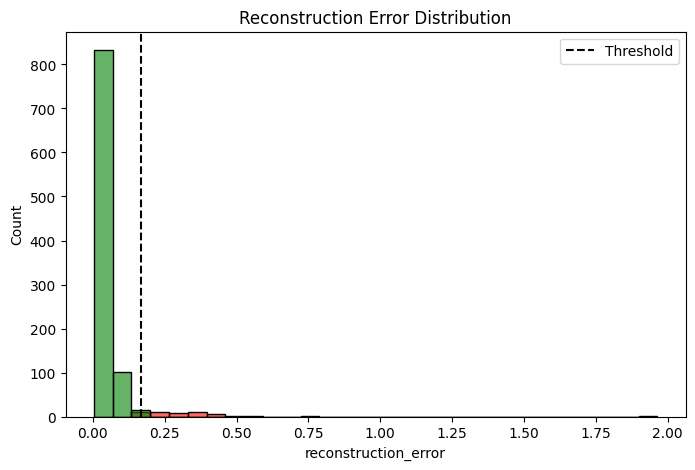

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="reconstruction_error", hue="anomaly_label",
             bins=30, palette={"Normal":"green","Risky":"red"}, alpha=0.6)
plt.axvline(threshold, color="black", linestyle="--", label="Threshold")
plt.title("Reconstruction Error Distribution")
plt.legend()
plt.show()


In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

# Autoencoder architecture
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)


decoded = Dense(32, activation='relu')(encoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, validation_split=0.1)

# Reconstruction error
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)
df['reconstruction_error'] = mse

# Detect anomalies (top 5% with highest error)
threshold = np.percentile(mse, 95)
df['anomaly_label1'] = ['Risky' if e > threshold else 'Normal' for e in mse]

print(df['anomaly_label1'].value_counts())


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0165 - val_loss: 0.7463
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8380 - val_loss: 0.6033
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7159 - val_loss: 0.4776
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5142 - val_loss: 0.3978
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4763 - val_loss: 0.3560
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3864 - val_loss: 0.3302
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3809 - val_loss: 0.2897
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3522 - val_loss: 0.2708
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3368 - val_loss: 0.2570
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3129 - val_loss: 0.2395
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2811 - val_loss: 0.2302
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2

In [46]:
# Show risky users with reconstruction error
risky_users = df[df['anomaly_label1'] == 'Risky'][['user', 'reconstruction_error']]

print("Risky Users Detected:")
print(risky_users.sort_values(by='reconstruction_error', ascending=False))

Risky Users Detected:
        user  reconstruction_error
969  WPR0368              0.780205
34   AJF0370              0.458310
425  HSB0196              0.387993
265  DLM0051              0.374649
300  EIS0041              0.372854
91   BAL0044              0.365136
134  BSS0369              0.355406
786  QRM0739              0.348694
678  MPM0220              0.347361
399  HDS0367              0.342018
902  TDS0984              0.340069
114  BJP0134              0.326804
423  HRL0540              0.316947
452  IIW0249              0.293154
113  BJM0111              0.287165
129  BRM0995              0.279712
961  WIF0691              0.276611
418  HPH0075              0.271935
248  DFH0188              0.267017
228  CTR0341              0.265614
945  VIA0063              0.263458
239  DBB0384              0.260260
121  BMG0917              0.253544
316  ESJ0670              0.253222
675  MOH0273              0.249442
986  YIC0195              0.242086
440  IBB0359              0.23584

In [47]:
# Autoencoder architecture
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)


decoded = Dense(32, activation='relu')(encoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, validation_split=0.1)

# Reconstruction error
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)
df['reconstruction_error'] = mse

# Detect anomalies (top 5% with highest error)
threshold = np.percentile(mse, 98)
df['anomaly_label2'] = ['Risky' if e > threshold else 'Normal' for e in mse]

print(df['anomaly_label2'].value_counts())


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9100 - val_loss: 0.7954
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8166 - val_loss: 0.6857
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7358 - val_loss: 0.6152
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6767 - val_loss: 0.5617
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5420 - val_loss: 0.5089
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5267 - val_loss: 0.4262
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4529 - val_loss: 0.3689
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3740 - val_loss: 0.3196
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3634 - val_loss: 0.2789
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3185 - val_loss: 0.2578
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3096 - val_loss: 0.2405
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2

In [48]:
# Show risky users with reconstruction error
risky_users = df[df['anomaly_label2'] == 'Risky'][['user', 'reconstruction_error']]

print("Risky Users Detected:")
print(risky_users.sort_values(by='reconstruction_error', ascending=False))

Risky Users Detected:
        user  reconstruction_error
969  WPR0368              1.172380
452  IIW0249              0.609607
34   AJF0370              0.451779
423  HRL0540              0.426769
786  QRM0739              0.416633
425  HSB0196              0.409875
961  WIF0691              0.384722
265  DLM0051              0.372127
734  OBH0499              0.358728
591  LBH0942              0.352107
440  IBB0359              0.335007
908  THR0873              0.330235
477  JBD0616              0.325589
399  HDS0367              0.324631
129  BRM0995              0.312969
316  ESJ0670              0.298064
834  SAA0999              0.293576
228  CTR0341              0.291504
644  MDM0625              0.278259
9    ABC0174              0.276566


In [49]:
# Autoencoder architecture
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)


decoded = Dense(32, activation='relu')(encoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, validation_split=0.1)

# Reconstruction error
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)
df['reconstruction_error'] = mse


threshold = mse.mean() + 3 * mse.std()
df['anomaly_label3'] = ['Risky' if e > threshold else 'Normal' for e in mse]

print(df['anomaly_label3'].value_counts())

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9593 - val_loss: 0.7819
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9395 - val_loss: 0.6531
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7901 - val_loss: 0.5678
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6350 - val_loss: 0.4673
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5455 - val_loss: 0.4083
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4673 - val_loss: 0.3611
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4013 - val_loss: 0.3235
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3884 - val_loss: 0.3022
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3564 - val_loss: 0.2813
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3321 - val_loss: 0.2552
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3033 - val_loss: 0.2462
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3

In [50]:
# Show risky users with reconstruction error
risky_users = df[df['anomaly_label3'] == 'Risky'][['user', 'reconstruction_error']]

print("Risky Users Detected:")
print(risky_users.sort_values(by='reconstruction_error', ascending=False))

Risky Users Detected:
        user  reconstruction_error
969  WPR0368              0.830434
265  DLM0051              0.809569
440  IBB0359              0.698273
982  XWD0923              0.512702
592  LCB0664              0.456558
786  QRM0739              0.447954
734  OBH0499              0.437197
425  HSB0196              0.408778
908  THR0873              0.402735
489  JDF0593              0.396181
227  CTA0020              0.375770
477  JBD0616              0.365084
91   BAL0044              0.361320
902  TDS0984              0.359438
452  IIW0249              0.328084
559  KKW0879              0.326076
34   AJF0370              0.324228
418  HPH0075              0.323033
678  MPM0220              0.319866
248  DFH0188              0.308020
316  ESJ0670              0.303638
951  VTT0385              0.297704
134  BSS0369              0.281323


In [51]:
# Autoencoder architecture
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, validation_split=0.1)

# Reconstruction error
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)
df['reconstruction_error'] = mse


threshold = np.percentile(mse, 95)
df['anomaly_label4'] = ['Risky' if e > threshold else 'Normal' for e in mse]

print(df['anomaly_label4'].value_counts())

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9384 - val_loss: 0.6505
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6908 - val_loss: 0.4284
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4599 - val_loss: 0.2860
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3477 - val_loss: 0.2147
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2727 - val_loss: 0.1695
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2016 - val_loss: 0.1383
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1701 - val_loss: 0.1140
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1573 - val_loss: 0.0966
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1267 - val_loss: 0.0871
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1250 - val_loss: 0.0773
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1077 - val_loss: 0.0720
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

In [52]:
# Show risky users with reconstruction error
risky_users = df[df['anomaly_label4'] == 'Risky'][['user', 'reconstruction_error']]

print("Risky Users Detected:")
print(risky_users.sort_values(by='reconstruction_error', ascending=False))

Risky Users Detected:
        user  reconstruction_error
969  WPR0368              0.831407
265  DLM0051              0.460806
425  HSB0196              0.285009
34   AJF0370              0.272586
591  LBH0942              0.248922
961  WIF0691              0.176600
300  EIS0041              0.165834
986  YIC0195              0.152544
399  HDS0367              0.150899
418  HPH0075              0.144580
113  BJM0111              0.143226
678  MPM0220              0.136297
982  XWD0923              0.135990
962  WIQ0567              0.130645
440  IBB0359              0.126166
91   BAL0044              0.125618
675  MOH0273              0.112796
121  BMG0917              0.109617
902  TDS0984              0.108859
908  THR0873              0.102671
114  BJP0134              0.101805
945  VIA0063              0.098261
995  ZKS0899              0.098124
951  VTT0385              0.091347
160  CCA0046              0.082953
644  MDM0625              0.081614
833  RZC0746              0.08138

In [53]:
# Autoencoder architecture
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, validation_split=0.1)

# Reconstruction error
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)
df['reconstruction_error'] = mse


threshold = np.percentile(mse, 98)
df['anomaly_label5'] = ['Risky' if e > threshold else 'Normal' for e in mse]

print(df['anomaly_label5'].value_counts())

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9454 - val_loss: 0.7179
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7117 - val_loss: 0.3993
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4070 - val_loss: 0.2707
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3073 - val_loss: 0.1978
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2451 - val_loss: 0.1609
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2120 - val_loss: 0.1240
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1641 - val_loss: 0.1122
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1548 - val_loss: 0.0997
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1318 - val_loss: 0.0884
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1357 - val_loss: 0.0804
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1171 - val_loss: 0.0783
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1

In [54]:
# Show risky users with reconstruction error
risky_users = df[df['anomaly_label5'] == 'Risky'][['user', 'reconstruction_error']]

print("Risky Users Detected:")
print(risky_users.sort_values(by='reconstruction_error', ascending=False))

Risky Users Detected:
        user  reconstruction_error
969  WPR0368              0.689579
34   AJF0370              0.609898
678  MPM0220              0.455079
961  WIF0691              0.258393
399  HDS0367              0.203608
300  EIS0041              0.189895
591  LBH0942              0.153768
425  HSB0196              0.148418
982  XWD0923              0.145231
440  IBB0359              0.131265
91   BAL0044              0.118609
160  CCA0046              0.113360
675  MOH0273              0.111794
134  BSS0369              0.107825
265  DLM0051              0.105180
86   AVM0947              0.101484
418  HPH0075              0.098530
677  MOS0047              0.097666
127  BQS0525              0.087218
121  BMG0917              0.083261


In [55]:
# Autoencoder architecture
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dropout(0.2)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.2)(decoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, validation_split=0.1)

# Reconstruction error
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)
df['reconstruction_error'] = mse


threshold = mse.mean() + 3 * mse.std()
df['anomaly_label6'] = ['Risky' if e > threshold else 'Normal' for e in mse]

print(df['anomaly_label6'].value_counts())

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0799 - val_loss: 0.7467
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7628 - val_loss: 0.4905
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5055 - val_loss: 0.3325
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3882 - val_loss: 0.2212
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2737 - val_loss: 0.1661
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2279 - val_loss: 0.1413
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1924 - val_loss: 0.1234
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1575 - val_loss: 0.1044
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1391 - val_loss: 0.0925
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1247 - val_loss: 0.0853
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1247 - val_loss: 0.0811
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1

In [56]:
# Show risky users with reconstruction error
risky_users = df[df['anomaly_label6'] == 'Risky'][['user', 'reconstruction_error']]

print("Risky Users Detected:")
print(risky_users.sort_values(by='reconstruction_error', ascending=False))

Risky Users Detected:
        user  reconstruction_error
969  WPR0368              0.376854
425  HSB0196              0.230691
678  MPM0220              0.222676
418  HPH0075              0.212970
961  WIF0691              0.188113
300  EIS0041              0.152451
34   AJF0370              0.144270
786  QRM0739              0.139848
113  BJM0111              0.127240
591  LBH0942              0.125780
399  HDS0367              0.121117
265  DLM0051              0.116665
440  IBB0359              0.097793
908  THR0873              0.097474
491  JFC0557              0.096811
675  MOH0273              0.094293
986  YIC0195              0.092154
695  NAF0326              0.089967


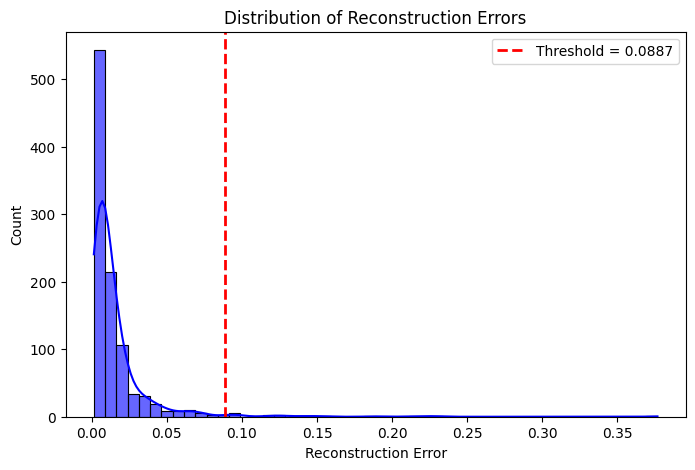

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# Histogram / KDE of reconstruction errors
sns.histplot(df['reconstruction_error'], bins=50, kde=True, color='blue', alpha=0.6)

# Plot threshold line
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f"Threshold = {threshold:.4f}")

plt.title("Distribution of Reconstruction Errors")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.legend()
plt.show()
